#1) Explain the differences between AI, ML, Deep Learning(DL), and Data Science(DS).
  - AI makes machines mimic human intelligence.
  - ML let machines learn from data without being explicity programmed.
  - Deep Learning(DL) use neural networks ( especially deep ones ) to model complex patterns.
  - Data Science extract insights from data using statistics, ML,and domain knowledge.
     - So, AI is the goal, ML is a method to achieve AI, DL is powerful ML technique and Data Science uses all these tools to understand and use data effectively.



#2) What are the types of machine learning ? Describe each with one real-world examples.
  - There are four types of machine learning:-
     - Supervised learning learns from labeled data (input-output pairs ). Example- Email spam detection.
     - Unsupervised learning learns from unlabeled data( no predefined output). Example- Customer segmentation in marketing.
     - Semi-Supervised learning learns from a small amount of labeled data + a large amount of unlabeled data. Example- Medical image Classification (few labeled scans, many unlabeled).
     - Reinforcement learning learns by interacting with an environment and getting feedback ( rewards or penalities ). Example- Self-driving cars learning to navigate.




#3) Define overfitting, underfitting and bias-variance tradeoff in machine learning.
  - Overfitting: The model learns the training data too well, including noise and details, leading to poor performance on new, unseen data.
  - Underfitting: The model is too simple to capture the underlying patterns in the data, resulting in poor performance on both training and test data.
  - Bias-Variance tradeoff: It's the balance between bias( error from wrong assumptions ) and variance( error from sensitivity to training data).





#4) What are outliers in a dataset, and list three common techniques for handling them.
  - Outliers are data points that are significantly different from the majority of the data.
  - Three common techniques for handling them:
     - Dropping the outliers
     - Replacement with mean and median
     - Capping




#5) Explain the process of handling missing values and mention one imputation technique for numerical and one for categorical data.
  - The process of handling missing values involves identification of missing values, understanding the cause, choosing a strategy and implementation. Imputation technique for numerical data is mean and for categorical data is mode.

In [3]:
#6) Write a Python program that:
""" - Creates a synthetic imbalanced dartaset with make_classification() from sklearn.datasets.
    - Prints the distribution."""


import numpy as np
from sklearn.datasets import make_classification


x,y= make_classification(n_samples=1000,n_features=4, n_clusters_per_class=2, weights=[0.8, 0.2], random_state=42)

class_counts=np.bincount(y)
class_distribution= {f"class {i}":count for i, count in enumerate(class_counts)}

print("class distribution")
for class_name, count in class_distribution.items():
  print(f"{class_name}: {count} samples ({count/len(y)*100: .1f}%)")

class distribution
class 0: 795 samples ( 79.5%)
class 1: 205 samples ( 20.5%)


In [ ]:
#7) Implement one-hot encoding using pandas for the following list of colors: ['Red','Green','Blue','Green','Red']. Print the resulting dataframe.

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

df=pd.DataFrame({"colors":['Red','Green','Blue','Green','Red']})
encoder=OneHotEncoder()

encoded =encoder.fit_transform(df[["colors"]]).toarray()
encoder.get_feature_names_out()
encoder_df=pd.DataFrame(encoded,columns=encoder.get_feature_names_out())
print(encoder_df)

   colors_Blue  colors_Green  colors_Red
0          0.0           0.0         1.0
1          0.0           1.0         0.0
2          1.0           0.0         0.0
3          0.0           1.0         0.0
4          0.0           0.0         1.0


/tmp/ipython-input-3302479101.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


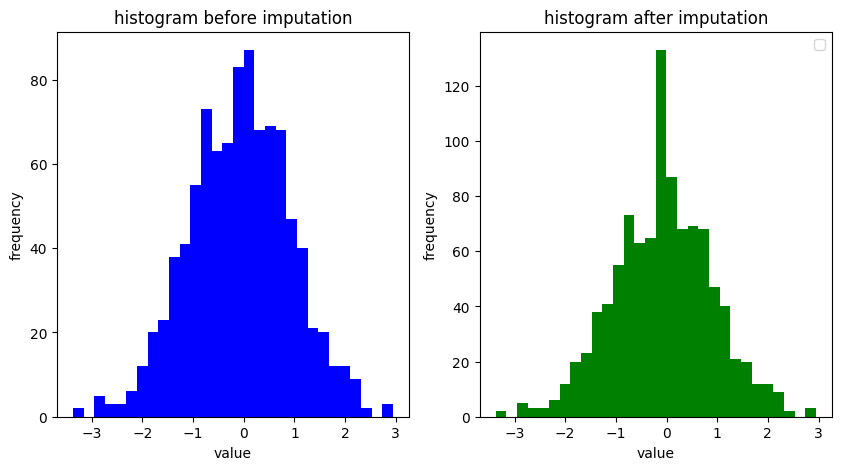

In [5]:
#8) Write a Python script to:
""" - Generate 1000 samples from a normal distribution.
    - Introduce 50 random missing values.
    - Fill missing values with the column mean.
    - Plot a histogram before and after imputation."""




import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=np.random.normal(loc=0,scale=1,size=1000)
data_with_missing=data.copy()

missing_indices=np.random.choice(len(data_with_missing), size=50,replace=False)
data_with_missing[missing_indices]=np.nan
df=pd.Series(data_with_missing)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(df.dropna(), bins=30,color="blue")
plt.title("histogram before imputation")
plt.xlabel("value")
plt.ylabel("frequency")

df_imputed=df.fillna(df.mean())

plt.subplot(1,2,2)
plt.hist(df_imputed, bins=30,color="green")
plt.title("histogram after imputation")
plt.xlabel("value")
plt.ylabel("frequency")
plt.legend()
plt.show()


In [6]:
#9) Implement Min-Max scaling on the following list of numbers [2,5,10,15,28] using sklearn.preprocessing.MinMaxScaler. Print the scaled array.

import numpy as np
from sklearn.preprocessing import MinMaxScaler

num=[2,5,10,15,28]
num_array=np.array(num).reshape(-1,1)

scaler=MinMaxScaler()
scaled_num= scaler.fit_transform(num_array)

print("scaled array:")
print(scaled_num.flatten())


scaled array:
[0.         0.11538462 0.30769231 0.5        1.        ]


<>:37: SyntaxWarning: invalid escape sequence '\m'
<>:37: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-368264692.py:37: SyntaxWarning: invalid escape sequence '\m'
  print("\missing values:")
/tmp/ipython-input-368264692.py:76: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


initial class distribution
fraud
0    0.894
1    0.106
Name: proportion, dtype: float64
\missing values:
age                   100
transaction_amount      0
fraud                   0
payment_method          0
dtype: int64
inal distribution:
fraud
0    0.5
1    0.5
Name: proportion, dtype: float64

Missing values after imputation:
age                   0
transaction_amount    0
payment_cash          0
payment_credit        0
payment_debit         0
fraud                 0
dtype: int64


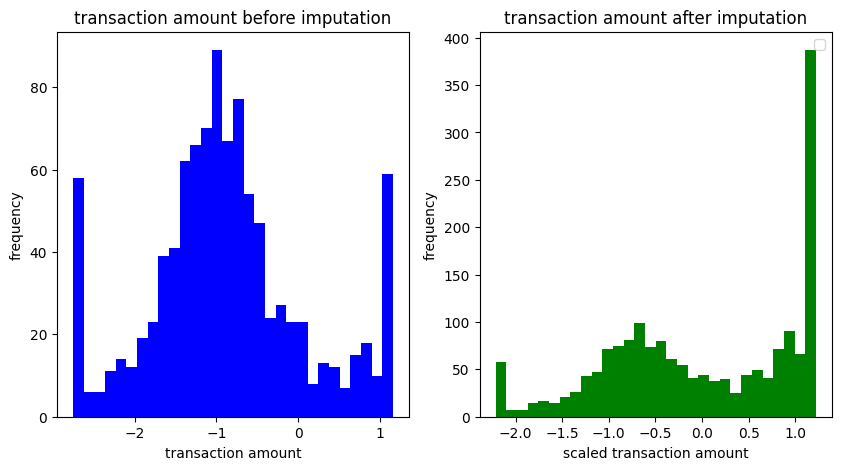

In [10]:
#10) You are working as a data scientist for a retail company. You recieve a customer transaction dataset that contains:
""" - Missing ages.
    - Outliers in transaction amount.
    - A highly imbalanced target (fraud vs non-fraud).
    - Categorical variables like payment method.
Explain the step-by-step data preparation plan you'd follow before training a machine learning model include how you'd address missing data, outliers, imbalance and encoding."""




import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

np.random.seed(42)

x,y= make_classification( n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, weights=[0.9,0.1],random_state=42)

df=pd.DataFrame(x,columns=["age","transaction_amount"])
df["fraud"]=y

df["payment_method"]=np.random.choice(["credit","debit","cash"],size=1000, p=[0.5,0.3,0.2])

missing_values= np.random.choice(1000, size=100, replace=False)
df.loc[missing_values, "age"]=np.nan

outlier_data=np.random.choice(1000, size=20, replace=False)
df.loc[outlier_data,"transaction_amount"]*=10


print("initial class distribution")
print(df["fraud"].value_counts(normalize=True))
print("\missing values:")
print(df.isnull().sum())

imputer=SimpleImputer(strategy="median")
df["age"]=imputer.fit_transform(df[["age"]])

Q1,Q3=df["transaction_amount"].quantile([0.05,0.95])
df["transaction_amount"]=df["transaction_amount"].clip(lower=Q1,upper=Q3)

df=pd.get_dummies(df,columns=["payment_method"],prefix="payment")

smote=SMOTE(random_state=42)
x_resampled, y_resampled=smote.fit_resample(df.drop("fraud",axis=1), df["fraud"])

df_resampled=pd.DataFrame(x_resampled, columns=df.drop("fraud",axis=1).columns)
df_resampled["fraud"]=y_resampled

scaler=StandardScaler()
df_resampled[["age","transaction_amount"]]= scaler.fit_transform(df_resampled[["age","transaction_amount"]])

print("\final distribution:")
print(df_resampled["fraud"].value_counts(normalize=True))
print("\nMissing values after imputation:")
print(df_resampled.isnull().sum())



plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(df["transaction_amount"], bins=30,color="blue")
plt.title("transaction amount before imputation")
plt.xlabel("transaction amount")
plt.ylabel("frequency")

plt.subplot(1,2,2)
plt.hist(df_resampled["transaction_amount"], bins=30,color="green")
plt.title("transaction amount after imputation")
plt.xlabel("scaled transaction amount")
plt.ylabel("frequency")
plt.legend()
plt.show()
